## import and read data

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import re

## CHANGE PATH FOR YOU MACHINE

In [2]:
# Define the paths to the files
gift_card_path = 'Sentiment-analysis-with-LLM/raw_data/amazon_reviews_us_Gift_Card_v1_00.tsv'
major_appliances_path = 'Sentiment-analysis-with-LLM/raw_data/amazon_reviews_us_Major_Appliances_v1_00.tsv'

# Read the files into dataframes
df_gift_card = pd.read_csv(gift_card_path, sep='\t', error_bad_lines=False)
df_major_appliances = pd.read_csv(major_appliances_path, sep='\t', error_bad_lines=False)

# Display the first few rows of each dataframe to verify
print("Gift Card Reviews DataFrame:")
display(df_gift_card.head())
print("\nMajor Appliances Reviews DataFrame:")
display(df_major_appliances.head())


/var/folders/3h/r5l1t4656pbc6bzdv94m9wrm0000gn/T/ipykernel_30592/1231357979.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_gift_card = pd.read_csv(gift_card_path, sep='\t', error_bad_lines=False)
/var/folders/3h/r5l1t4656pbc6bzdv94m9wrm0000gn/T/ipykernel_30592/1231357979.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_major_appliances = pd.read_csv(major_appliances_path, sep='\t', error_bad_lines=False)
Skipping line 5583: expected 15 fields, saw 22
Skipping line 22814: expected 15 fields, saw 22
Skipping line 22883: expected 15 fields, saw 22
Skipping line 29872: expected 15 fields, saw 22
Skipping line 37242: expected 15 fields, saw 22
Skipping line 59693: expected 15 fields, saw 22



Gift Card Reviews DataFrame:


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31



Major Appliances Reviews DataFrame:


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,16199106,R203HPW78Z7N4K,B0067WNSZY,633038551,"FGGF3032MW Gallery Series 30"" Wide Freestandin...",Major Appliances,5,0,0,N,Y,"If you need a new stove, this is a winner.",What a great stove. What a wonderful replacem...,2015-08-31
1,US,16374060,R2EAIGVLEALSP3,B002QSXK60,811766671,Best Hand Clothes Wringer,Major Appliances,5,1,1,N,Y,Five Stars,worked great,2015-08-31
2,US,15322085,R1K1CD73HHLILA,B00EC452R6,345562728,Supco SET184 Thermal Cutoff Kit,Major Appliances,5,0,0,N,Y,Fast Shipping,Part exactly what I needed. Saved by purchasi...,2015-08-31
3,US,32004835,R2KZBMOFRMYOPO,B00MVVIF2G,563052763,Midea WHS-160RB1 Compact Single Reversible Doo...,Major Appliances,5,1,1,N,Y,Five Stars,Love my refrigerator! ! Keeps everything cold...,2015-08-31
4,US,25414497,R6BIZOZY6UD01,B00IY7BNUW,874236579,Avalon Bay Portable Ice Maker,Major Appliances,5,0,0,N,Y,Five Stars,No more running to the store for ice! Works p...,2015-08-31


In [3]:
df_gift_card.info()
print(df_gift_card.shape)
df_major_appliances.info()
print(df_major_appliances.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148310 entries, 0 to 148309
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        148310 non-null  object
 1   customer_id        148310 non-null  int64 
 2   review_id          148310 non-null  object
 3   product_id         148310 non-null  object
 4   product_parent     148310 non-null  int64 
 5   product_title      148310 non-null  object
 6   product_category   148310 non-null  object
 7   star_rating        148310 non-null  int64 
 8   helpful_votes      148310 non-null  int64 
 9   total_votes        148310 non-null  int64 
 10  vine               148310 non-null  object
 11  verified_purchase  148310 non-null  object
 12  review_headline    148307 non-null  object
 13  review_body        148308 non-null  object
 14  review_date        148309 non-null  object
dtypes: int64(5), object(10)
memory usage: 17.0+ MB
(148310, 15)
<class '

## Some preprocessing and exploration

### Rating Distribution

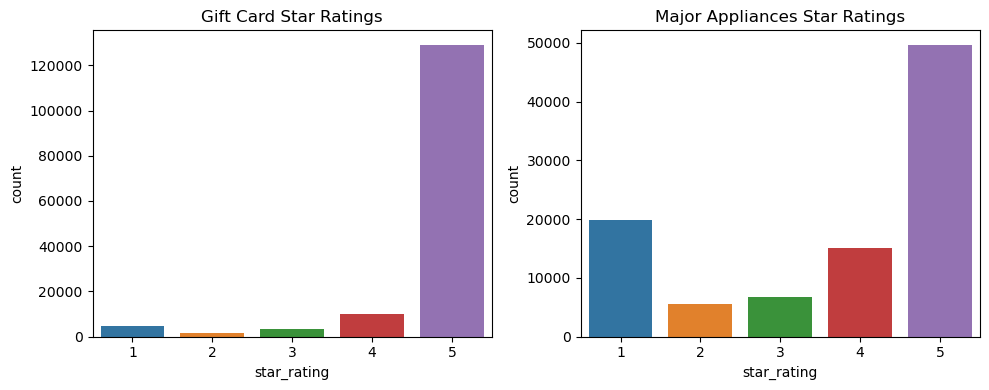

In [4]:
# Convert review_date to datetime format
df_gift_card['review_date'] = pd.to_datetime(df_gift_card['review_date'])
df_major_appliances['review_date'] = pd.to_datetime(df_major_appliances['review_date'])

# Plotting rating distributions for both datasets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df_gift_card, x='star_rating')
plt.title('Gift Card Star Ratings')

plt.subplot(1, 2, 2)
sns.countplot(data=df_major_appliances, x='star_rating')
plt.title('Major Appliances Star Ratings')
plt.tight_layout()
plt.show()


### Time Series Analysis

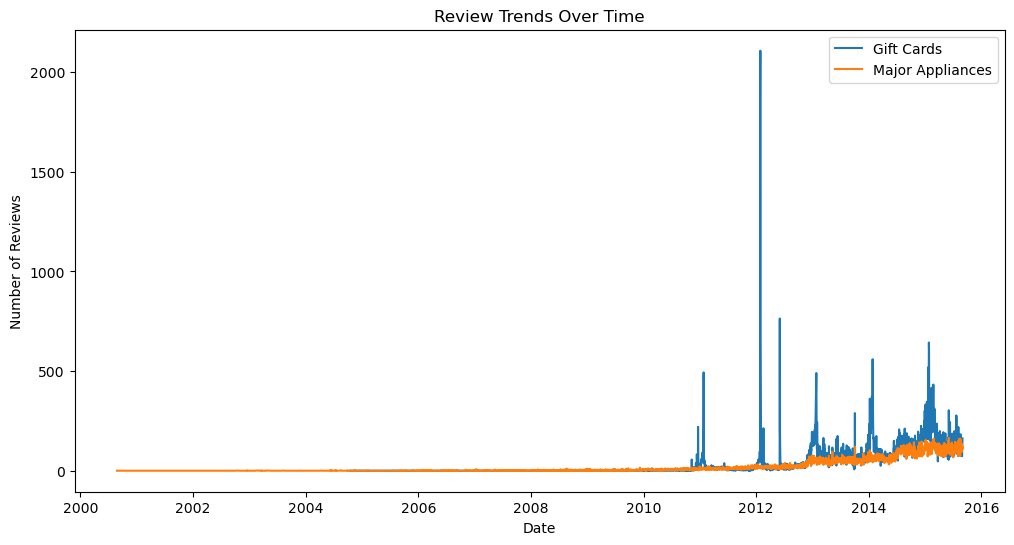

In [5]:
# Group by review date and count the number of reviews each day
reviews_per_day_gift_card = df_gift_card.groupby(df_gift_card['review_date'].dt.date).size()
reviews_per_day_major_appliances = df_major_appliances.groupby(df_major_appliances['review_date'].dt.date).size()

# Plotting
plt.figure(figsize=(12, 6))
reviews_per_day_gift_card.plot(label='Gift Cards')
reviews_per_day_major_appliances.plot(label='Major Appliances')
plt.title('Review Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend()
plt.show()


### Text Analysis

#### Wordcloud

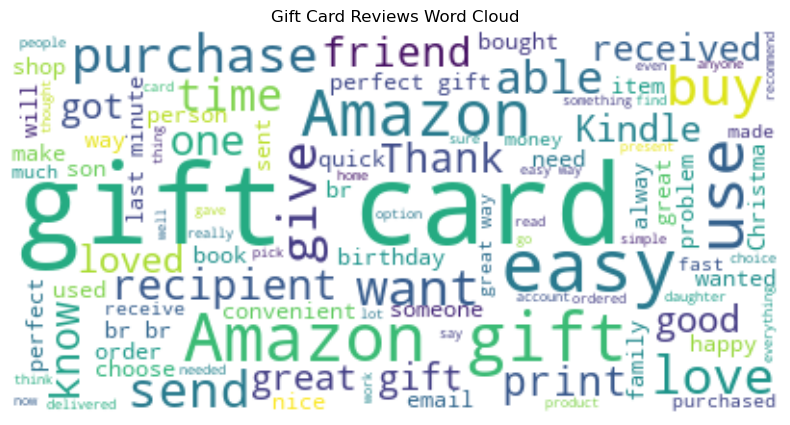

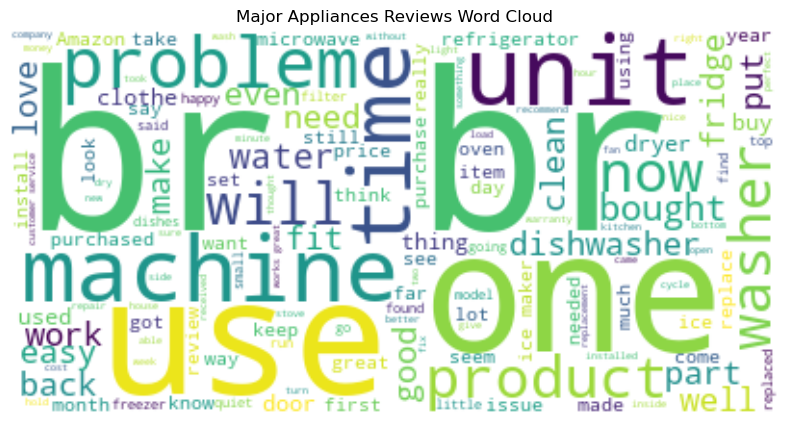

In [6]:
# Combine all review texts into one large text
text_gift_cards = ' '.join(df_gift_card['review_body'].dropna())
text_major_appliances = ' '.join(df_major_appliances['review_body'].dropna())

# Generate a word cloud image
wordcloud_gift_cards = WordCloud(background_color='white').generate(text_gift_cards)
wordcloud_major_appliances = WordCloud(background_color='white').generate(text_major_appliances)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_gift_cards, interpolation='bilinear')
plt.axis("off")
plt.title('Gift Card Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_major_appliances, interpolation='bilinear')
plt.axis("off")
plt.title('Major Appliances Reviews Word Cloud')
plt.show()


#### Sentiment Analysis

In [7]:
def compute_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Compute sentiment for a subset to demonstrate
df_gift_card['sentiment'] = df_gift_card['review_body'].dropna().apply(compute_sentiment)
df_major_appliances['sentiment'] = df_major_appliances['review_body'].dropna().apply(compute_sentiment)



##### Sentiment Distribution Analysis

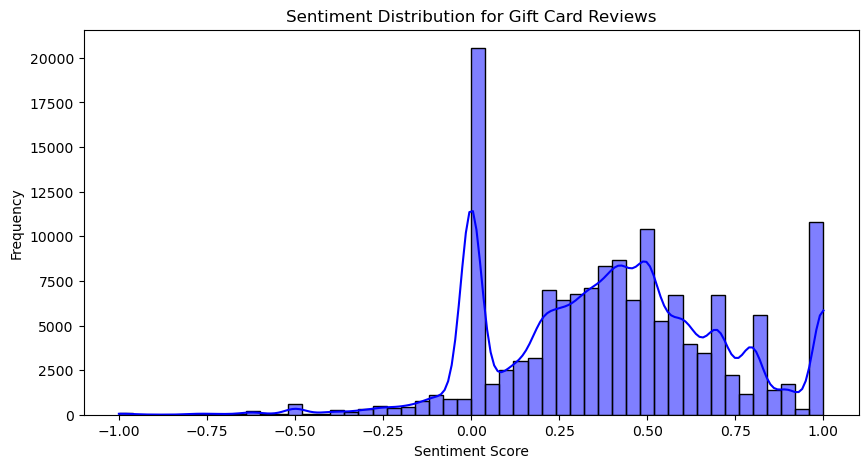

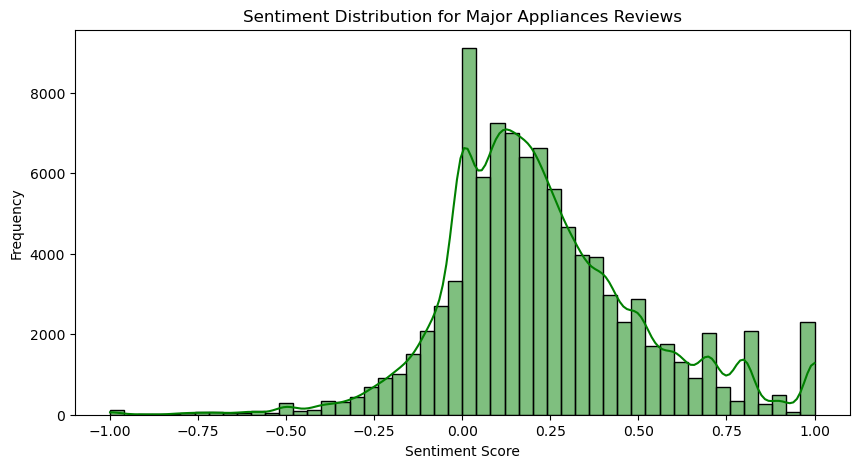

In [8]:
# Sentiment distribution for Gift Cards
plt.figure(figsize=(10, 5))
sns.histplot(df_gift_card['sentiment'], bins=50, kde=True, color='blue')
plt.title('Sentiment Distribution for Gift Card Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Sentiment distribution for Major Appliances
plt.figure(figsize=(10, 5))
sns.histplot(df_major_appliances['sentiment'], bins=50, kde=True, color='green')
plt.title('Sentiment Distribution for Major Appliances Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


##### Average Sentiment Score Comparison

In [9]:
avg_sentiment_gift_card = df_gift_card['sentiment'].mean()
avg_sentiment_major_appliances = df_major_appliances['sentiment'].mean()

print(f"Average Sentiment for Gift Card Reviews: {avg_sentiment_gift_card}")
print(f"Average Sentiment for Major Appliances Reviews: {avg_sentiment_major_appliances}")


Average Sentiment for Gift Card Reviews: 0.40137552430081996
Average Sentiment for Major Appliances Reviews: 0.22947997775612405


##### Sentiment Over Time

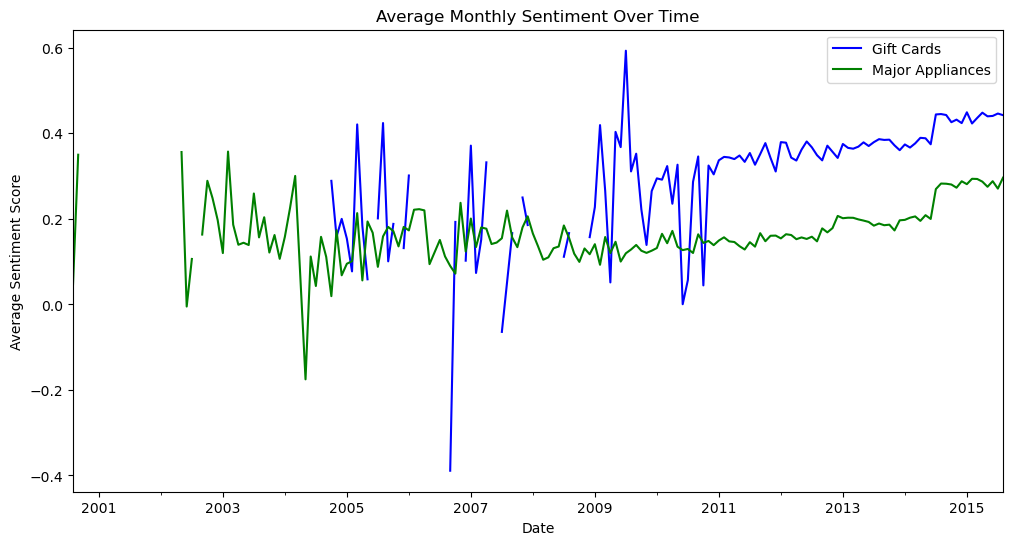

In [10]:
df_gift_card['review_date'] = pd.to_datetime(df_gift_card['review_date'])
df_major_appliances['review_date'] = pd.to_datetime(df_major_appliances['review_date'])

# Calculate average sentiment by month for demonstration
monthly_sentiment_gift_card = df_gift_card.resample('M', on='review_date')['sentiment'].mean()
monthly_sentiment_major_appliances = df_major_appliances.resample('M', on='review_date')['sentiment'].mean()

plt.figure(figsize=(12, 6))
monthly_sentiment_gift_card.plot(label='Gift Cards', color='blue')
monthly_sentiment_major_appliances.plot(label='Major Appliances', color='green')
plt.title('Average Monthly Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.show()


##### Correlation Analysis

In [11]:
# Correlation between sentiment and star rating for Gift Cards
correlation_gift_card = df_gift_card[['sentiment', 'star_rating']].corr()
print("Correlation between sentiment and star rating for Gift Cards:\n", correlation_gift_card)

# Correlation for Major Appliances
correlation_major_appliances = df_major_appliances[['sentiment', 'star_rating']].corr()
print("\nCorrelation between sentiment and star rating for Major Appliances:\n", correlation_major_appliances)


Correlation between sentiment and star rating for Gift Cards:
              sentiment  star_rating
sentiment     1.000000     0.297404
star_rating   0.297404     1.000000

Correlation between sentiment and star rating for Major Appliances:
              sentiment  star_rating
sentiment     1.000000     0.503299
star_rating   0.503299     1.000000


##### Sentiment Score by Verified Purchase

In [12]:
# Average sentiment for verified vs non-verified purchases in Gift Cards
avg_sentiment_verified_gift_card = df_gift_card[df_gift_card['verified_purchase'] == 'Y']['sentiment'].mean()
avg_sentiment_non_verified_gift_card = df_gift_card[df_gift_card['verified_purchase'] == 'N']['sentiment'].mean()

print("Average sentiment for verified purchases (Gift Cards):", avg_sentiment_verified_gift_card)
print("Average sentiment for non-verified purchases (Gift Cards):", avg_sentiment_non_verified_gift_card)


Average sentiment for verified purchases (Gift Cards): 0.40478336482750443
Average sentiment for non-verified purchases (Gift Cards): 0.36596539149175084


### Review Quality and Helpfulness

#### Helpful Votes Analysis

In [13]:
# Explore correlation between helpful votes and star rating
correlation_gift_card = df_gift_card[['helpful_votes', 'star_rating']].corr()
correlation_major_appliances = df_major_appliances[['helpful_votes', 'star_rating']].corr()

print("Correlation between helpful votes and star rating for Gift Card Reviews:\n", correlation_gift_card)
print("\nCorrelation between helpful votes and star rating for Major Appliances Reviews:\n", correlation_major_appliances)


Correlation between helpful votes and star rating for Gift Card Reviews:
                helpful_votes  star_rating
helpful_votes       1.000000    -0.053823
star_rating        -0.053823     1.000000

Correlation between helpful votes and star rating for Major Appliances Reviews:
                helpful_votes  star_rating
helpful_votes        1.00000     -0.04016
star_rating         -0.04016      1.00000


#### Verified Purchase Reviews

In [14]:
# Compare average star rating for verified vs. non-verified purchases
avg_rating_verified_gift_card = df_gift_card[df_gift_card['verified_purchase'] == 'Y']['star_rating'].mean()
avg_rating_non_verified_gift_card = df_gift_card[df_gift_card['verified_purchase'] == 'N']['star_rating'].mean()

print("Average rating for verified purchases (Gift Cards):", avg_rating_verified_gift_card)
print("Average rating for non-verified purchases (Gift Cards):", avg_rating_non_verified_gift_card)


Average rating for verified purchases (Gift Cards): 4.746076916822506
Average rating for non-verified purchases (Gift Cards): 4.578142999769603


### Product-Specific Insights
#### Top Rated Products

In [15]:
# Identify top-rated gift cards by average star rating
top_rated_gift_cards = df_gift_card.groupby('product_title')['star_rating'].mean().sort_values(ascending=False).head(10)

print("Top Rated Gift Cards:")
print(top_rated_gift_cards)


Top Rated Gift Cards:
product_title
Graduation Name Cards for Invitations and Announcements-Blank-Printable Card Stock              5.0
Amazon Gift Card - Print - 21st Birthday (Beer)                                                 5.0
Amazon Gift Card - Facebook - Your Standing O (Animated) [American Greetings]                   5.0
Amazon eGift Card - Feliz Dia del Padre (Argyle)                                                5.0
Amazon Gift Card - Facebook - You Are Special to Me Birthday (Animated) [American Greetings]    5.0
Amazon Gift Card - Facebook - Year of the Horse (2014)                                          5.0
Amazon eGift Card - Feliz Dia del Padre (Bicycling)                                             5.0
Amazon Gift Card - Facebook - Wishing Magical Holidays (Animated) [Hallmark]                    5.0
Amazon eGift Card - Feliz Dias de las Madres (Flowers)                                          5.0
Amazon Gift Card - Facebook - Wedding Bells (Animated) [Hallmark

In [16]:
# Identify top-rated major appliances by average star rating
top_rated_major_appliances = df_major_appliances.groupby('product_title')['star_rating'].mean().sort_values(ascending=False).head(10)

print("Top Rated Major Appliances:")
print(top_rated_major_appliances)


Top Rated Major Appliances:
product_title
 30-INCH"" SKK-BB stacking kit for ""30 INCH"" wide front load laundry pairs                                                             5.0
Whirlpool Part Number 34001432: BELLOW                                                                                                   5.0
Whirlpool Part Number 34001131: VALVE, INLET (HOT WATER)                                                                                 5.0
LG BASKET ASSEMBLY DOOR AAP73252301 Model: AAP73252301                                                                                   5.0
LG AJU33450701 VALVE ASSEMBLY,INLET                                                                                                      5.0
EdgeStar Portable Pink Ice Maker Benefiting Susan                                                                                        5.0
LG ADQ36006101 Compatible Refrigerator Water and Ice Filter by Zuma Water Filters (OPFL3)                       

## Join both Datasets

In [17]:
# Concatenate the two dataframes vertically
df_combined = pd.concat([df_gift_card, df_major_appliances], ignore_index=True)

# Check the combined dataframe
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245144 entries, 0 to 245143
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   marketplace        245144 non-null  object        
 1   customer_id        245144 non-null  int64         
 2   review_id          245144 non-null  object        
 3   product_id         245144 non-null  object        
 4   product_parent     245144 non-null  int64         
 5   product_title      245144 non-null  object        
 6   product_category   245144 non-null  object        
 7   star_rating        245144 non-null  int64         
 8   helpful_votes      245144 non-null  int64         
 9   total_votes        245144 non-null  int64         
 10  vine               245144 non-null  object        
 11  verified_purchase  245144 non-null  object        
 12  review_headline    245140 non-null  object        
 13  review_body        245135 non-null  object  

### Sentiment Distribution

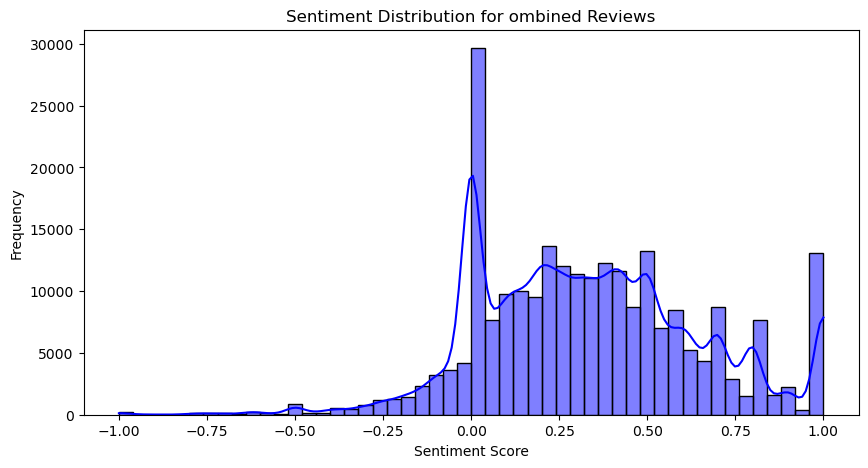

In [18]:
# Sentiment distribution for Gift Cards
plt.figure(figsize=(10, 5))
sns.histplot(df_combined['sentiment'], bins=50, kde=True, color='blue')
plt.title('Sentiment Distribution for ombined Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

##### Correlation Analysis

In [19]:
# Correlation between sentiment and star rating for Gift Cards
correlation_df_combined = df_combined[['sentiment', 'star_rating']].corr()
print("Correlation between sentiment and star rating for Gift Cards:\n", correlation_gift_card)


Correlation between sentiment and star rating for Gift Cards:
                helpful_votes  star_rating
helpful_votes       1.000000    -0.053823
star_rating        -0.053823     1.000000
